In [1]:
from tensorflow.keras.applications import MobileNet
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x) 

num_classes = 2  

predictions = Dense(num_classes, activation='softmax')(x)

for layer in base_model.layers:
    layer.trainable = False

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

batch_size = 32
epochs = 10
total_train = 2099
total_val = 300 

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\semih\Desktop\brain\train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        r'C:\Users\semih\Desktop\brain\val',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical')


model.fit(train_generator, 
          steps_per_epoch=total_train // batch_size, 
          epochs=epochs, 
          validation_data=val_generator, 
          validation_steps=total_val // batch_size)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Found 2099 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Epoch 1/10


C:\Users\semih\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7010 - loss: 0.5406 - val_accuracy: 0.8633 - val_loss: 0.3287
Epoch 2/10


C:\Users\semih\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 985ms/step - accuracy: 0.9475 - loss: 0.1701 - val_accuracy: 0.8633 - val_loss: 0.3101
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 300ms/step - accuracy: 0.9837 - loss: 0.0774 - val_accuracy: 0.8667 - val_loss: 0.3000
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 31s 963ms/step - accuracy: 0.9609 - loss: 0.1208 - val_accuracy: 0.8800 - val_loss: 0.3093
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 30s 965ms/step - accuracy: 0.9644 - loss: 0.1030 - val_accuracy: 0.8933 - val_loss: 0.2399
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 324ms/step - accuracy: 0.9758 - loss: 0.0763 - val_accuracy: 0.8900 - val_loss: 0.2516
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.9852 - loss: 0.0679 - val_accuracy: 0.9000 - val_loss: 0.2418
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 29s 942ms/step - accuracy: 0.9816 - loss: 0.0592 - val_accuracy: 0.9200 - val_loss: 0.1830
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.9921 - loss: 0.0444 - val_accuracy: 0.9033 - 

In [4]:
import tensorflow as tf
from PIL import Image
import os

os.getcwd()

'C:\\Users\\semih'

In [26]:
image_path = r'C:\Users\semih\Desktop\brain\test\yes\y25.jpg'

image = Image.open(image_path)
image_resized = image.resize((224,224))
image_tensor = tf.keras.preprocessing.image.img_to_array(image_resized)
image_tensor_expanded = tf.expand_dims(image_tensor, axis=0)

In [29]:
class_labels = {0: 'no', 1: 'yes'}

predictions = model.predict(image_tensor_expanded)
predicted_class_index = tf.argmax(predictions, axis=-1).numpy()[0]
predicted_class = class_labels[predicted_class_index]
print("Tahmin edilen sınıf:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Tahmin edilen sınıf: yes


10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
              precision    recall  f1-score   support

          no       0.53      0.45      0.49       150
         yes       0.52      0.59      0.55       150

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300



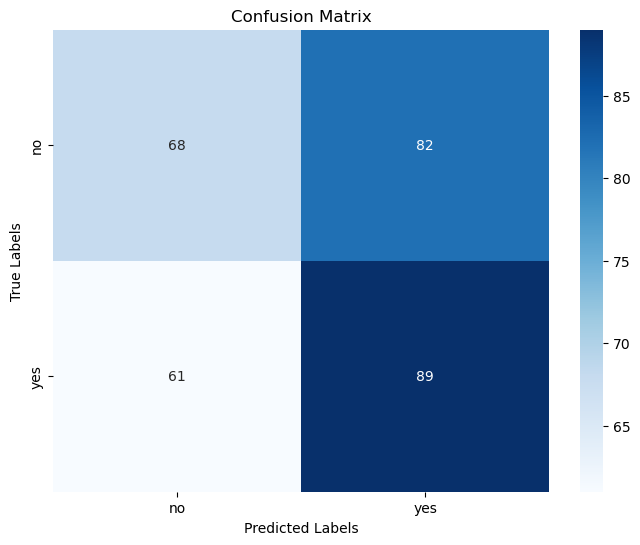

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = val_generator.classes

class_names = list(val_generator.class_indices.keys())
print(classification_report(true_classes, y_pred_classes, target_names=class_names))
conf_matrix = confusion_matrix(true_classes, y_pred_classes)


import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()